In [1]:
%matplotlib inline
from sklearn import decomposition
from sklearn.manifold import LocallyLinearEmbedding, MDS, TSNE, SpectralEmbedding, Isomap
import numpy as np
import matplotlib.pyplot as plt

## Load Features

### MNIST

In [2]:
mnist_y = np.load('features/y_test_raw_MNIST.npy')
print(mnist_y.shape)

(10000,)


#### Raw

In [3]:
raw_mnist_X = np.load('features/X_test_raw_MNIST.npy')
print(raw_mnist_X.shape)

(10000, 784)


#### VGG

In [4]:
vgg_mnist_X = np.load('features/X_test_vgg19_MNIST.npy')
print(vgg_mnist_X.shape)

(10000, 512, 7, 7)


#### VGG - Compressed

In [ ]:
vggc_mnist_X = np.load('features/X_test_vgg19_MNIST_compressed.npy')
print(vggc_mnist_X.shape)

#### Scatter Net

In [5]:
scat_mnist_X = np.load('features/test_X_scatternet_mnist_bsz128_layer2.npy')
# Layer 1: 1764 -> (-1, 9, 14, 14)
# Layer 2: 3969 -> (-1, 81, 7, 7)
print(scat_mnist_X.shape)

(10000, 3969)


#### ResNet

In [6]:
resnet_mnist_X = np.load('features/X_test_resnet18_MNIST.npy')
print(resnet_mnist_X.shape)

(10000, 512, 1, 1)


### Fashion MNIST

In [7]:
fashion_y = np.load('features/y_test_raw_FashionMNIST.npy')
print(fashion_y.shape)

(10000,)


#### Raw

In [8]:
raw_fashion_X = np.load('features/X_test_raw_FashionMNIST.npy')
print(raw_fashion_X.shape)

(10000, 784)


#### VGG

In [9]:
vgg_fashion_X = np.load('features/X_test_vgg19_FashionMNIST.npy')
print(vgg_fashion_X.shape)

(10000, 512, 7, 7)


#### VGG - Compressed

In [ ]:
vggc_fashion_X = np.load('features/X_test_vgg19_FashionMNIST_compressed.npy')
print(vggc_fashion_X.shape)

#### Scatter Net

In [10]:
scat_fashion_X = np.load('features/test_X_scatternet_fashion-mnist_bsz128_layer2.npy')
# Layer 1: 1764 -> (-1, 9, 14, 14)
# Layer 2: 3969 -> (-1, 81, 7, 7)
print(scat_fashion_X.shape)

(10000, 3969)


#### ResNet

In [11]:
resnet_fashion_X = np.load('features/X_test_resnet18_FashionMNIST.npy')
print(resnet_fashion_X.shape)

(10000, 512)


### CIFAR10

In [12]:
cifar_y = np.load('features/y_test_raw_CIFAR10.npy')
print(cifar_y.shape)

(10000,)


#### Raw

In [13]:
raw_cifar_X = np.load('features/X_test_raw_CIFAR10.npy')
print(raw_cifar_X.shape)

(10000, 3072)


#### VGG

In [14]:
vgg_cifar_X = np.load('features/X_test_vgg19_CIFAR10.npy')
print(vgg_cifar_X.shape)

(10000, 512, 7, 7)


#### VGG - Compressed

In [ ]:
vggc_cifar_X = np.load('features/X_test_vgg19_CIFAR10_compressed.npy')
print(vggc_cifar_X.shape)

#### Scatter Net

In [15]:
scat_cifar_X = np.load('features/test_X_scatternet_cifar-10_bsz128_layer2.npy')
# Layer 1: 768 -> (-1, 3, 4, 8, 8)
# Layer 2: 1920 -> (-1, 3, 40, 4, 4)
print(scat_cifar_X.shape)

(10000, 1920)


#### ResNet

In [16]:
resnet_cifar_X = np.load('features/X_test_resnet18_CIFAR10.npy')
print(resnet_cifar_X.shape)

(10000, 512, 1, 1)


## Transform and Visualize Features

### Get and filter with norms - VGG

In [ ]:
norms = np.array([[np.linalg.norm(filters) for filters in imgs] for imgs in vgg_mnist_X])
print(norms.shape)
k = 5
n = np.sum(norms > k, axis=1)
print(n)
print(np.mean(n))
print(np.std(n))
fig = plt.figure(figsize=(10, 10))
columns = 10
rows = 18

count = 1
for i, norm in enumerate(norms[0]):
    if norm > k:
        fig.add_subplot(rows, columns, count)
        count += 1
        plt.imshow(vgg_mnist_X[0, i])

plt.show()

In [ ]:
norms = np.array([[np.linalg.norm(filters) for filters in imgs] for imgs in vgg_fashion_X])
print(norms.shape)
k = 5
n = np.sum(norms > k, axis=1)
print(np.mean(n))
print(np.std(n))
fig = plt.figure(figsize=(10, 10))
columns = 10
rows = 18

count = 1
for i, norm in enumerate(norms[0]):
    if norm > k:
        fig.add_subplot(rows, columns, count)
        count += 1
        plt.imshow(vgg_fashion_X[0, i])
        
plt.show()

In [ ]:
norms = np.array([[np.linalg.norm(filters) for filters in imgs] for imgs in vgg_cifar_X])
print(norms.shape)
k = 5
n = np.sum(norms > k, axis=1)
print(np.mean(n))
print(np.std(n))
fig = plt.figure(figsize=(10, 10))
columns = 10
rows = 18

count = 1
for i, norm in enumerate(norms[0]):
    if norm > k:
        fig.add_subplot(rows, columns, count)
        count += 1
        plt.imshow(vgg_cifar_X[0, i])
        
plt.show()

### Get and filter with norms - ScatNet

In [ ]:
%matplotlib inline
scat_mnist_X_uf = scat_mnist_X.reshape(10000, 81, 7, 7)
norms = np.array([[np.linalg.norm(filters) for filters in imgs] for imgs in scat_mnist_X_uf])
print(norms.shape)
k = 0
n = np.sum(norms > k, axis=1)
print(np.mean(n))
print(np.std(n))
fig = plt.figure(figsize=(10, 10))
columns = 10
rows = 18

count = 1
for i, norm in enumerate(norms[0]):
    if norm > k:
        fig.add_subplot(rows, columns, count)
        count += 1
        plt.imshow(scat_mnist_X_uf[0, i])
        
plt.show()

In [ ]:
%matplotlib inline
scat_fashion_X_uf = scat_fashion_X.reshape(10000, 81, 7, 7)
norms = np.array([[np.linalg.norm(filters) for filters in imgs] for imgs in scat_fashion_X_uf])
print(norms.shape)
k = 0
n = np.sum(norms > k, axis=1)
print(np.mean(n))
print(np.std(n))
fig = plt.figure(figsize=(10, 10))
columns = 10
rows = 18

count = 1
for i, norm in enumerate(norms[0]):
    if norm > k:
        fig.add_subplot(rows, columns, count)
        count += 1
        plt.imshow(scat_fashion_X_uf[0, i])
        
plt.show()

In [ ]:
%matplotlib inline
scat_cifar_X_uf = scat_cifar_X.reshape(10000, 3, 40, 4, 4)
scat_cifar_X_uf = scat_cifar_X_uf.reshape(10000, 3*40, 4, 4)
norms = np.array([[np.linalg.norm(filters) for filters in imgs] for imgs in scat_cifar_X_uf])
print(norms.shape)
k = 0
n = np.sum(norms > k, axis=1)
print(np.mean(n))
print(np.std(n))
fig = plt.figure(figsize=(10, 10))
columns = 10
rows = 18

count = 1
for i, norm in enumerate(norms[0]):
    if norm > k:
        fig.add_subplot(rows, columns, count)
        count += 1
        plt.imshow(scat_cifar_X_uf[0, i])
        
plt.show()

## Dimensionality Reduction

In [18]:
def visualize(X, y, targets, target_names, plot_name):
    plt.figure()
    colors = [
        '#8dd3c7',
        '#ffffb3',
        '#bebada',
        '#fb8072',
        '#80b1d3',
        '#fdb462',
        '#b3de69',
        '#fccde5',
        '#d9d9d9',
        '#bc80bd']
    lw = 0

    for color, i, target_name in zip(colors, targets, target_names):
        plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=.9, lw=lw,
                    label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title(plot_name)

    plt.show()

### MNIST

In [19]:
targets = list(range(10))
target_names = [str(i) for i in range(10)]
pca_plot_name = 'MNIST - PCA for {}, Variance: {:.3f}, {:.3f}'
lle_plot_name = 'MNIST - LLE for {}'
tsne_plot_name = 'MNIST - t-SNE for {}'
mds_plot_name = 'MNIST - MDS for {}'
sem_plot_name = 'MNIST - SEM for {}'

#### PCA - Raw

(10000, 2)


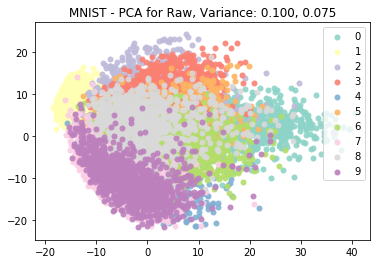

In [20]:
pca = decomposition.PCA(n_components=2)
X = pca.fit_transform(raw_mnist_X)
print(X.shape)
variance = pca.explained_variance_ratio_
name = pca_plot_name.format('Raw', variance[0], variance[1])
visualize(X, mnist_y, targets, target_names, name)

#### LLE - Raw

(10000, 2)


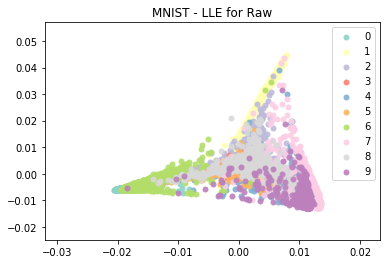

In [21]:
lle = LocallyLinearEmbedding(n_neighbors=10, n_components=2)
X = lle.fit_transform(raw_mnist_X)
print(X.shape)
name = lle_plot_name.format('Raw')
visualize(X, mnist_y, targets, target_names, name)

#### MDS - Raw

In [22]:
mds = MDS(n_components=2)
X = mds.fit_transform(raw_mnist_X)
print(X.shape)
name = mds_plot_name.format('Raw')
visualize(X, mnist_y, targets, target_names, plot_name)

KeyboardInterrupt: 

#### Spectral - Raw

(10000, 2)


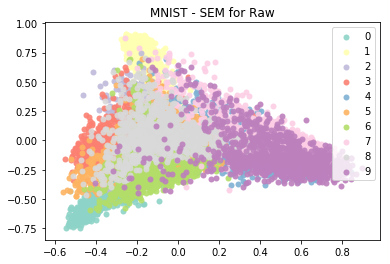

In [24]:
sem = SpectralEmbedding(n_components=2)
X = sem.fit_transform(raw_mnist_X)
print(X.shape)
name = sem_plot_name.format('Raw')
visualize(X, mnist_y, targets, target_names, name)

#### t-SNE - Raw

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.315s...
[t-SNE] Computed neighbors for 10000 samples in 125.126s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 7.857658
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.042618
[t-SNE] Error after 1000 iterations: 1.789655
(10000, 2)


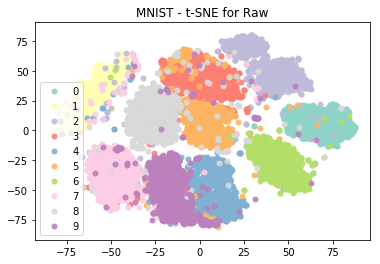

In [25]:
tsne = TSNE(n_components=2, init='pca', verbose=1)
X = tsne.fit_transform(raw_mnist_X)
print(X.shape)
name = tsne_plot_name.format('Raw')
visualize(X, mnist_y, targets, target_names, name)

#### PCA - VGG19

(10000, 2)


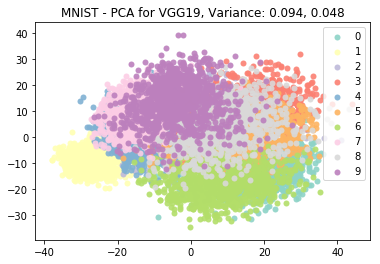

In [26]:
pca = decomposition.PCA(n_components=2)
X = pca.fit_transform(vgg_mnist_X.reshape(10000, 512*7*7))
print(X.shape)
variance = pca.explained_variance_ratio_
name = pca_plot_name.format('VGG19', variance[0], variance[1])
visualize(X, mnist_y, targets, target_names, name)

#### PCA - ScatNet

(10000, 2)


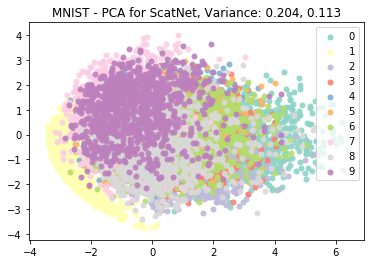

In [27]:
pca = decomposition.PCA(n_components=2)
X = pca.fit_transform(scat_mnist_X)
print(X.shape)
variance = pca.explained_variance_ratio_
name = pca_plot_name.format('ScatNet', variance[0], variance[1])
visualize(X, mnist_y, targets, target_names, name)

#### LLE - Scat

(10000, 2)


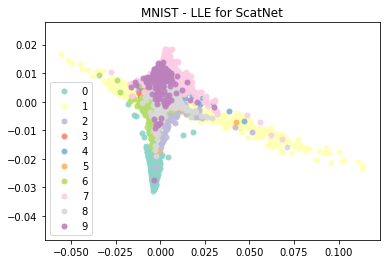

In [28]:
lle = LocallyLinearEmbedding(n_neighbors=10, n_components=2)
X = lle.fit_transform(scat_mnist_X)
print(X.shape)
name = lle_plot_name.format('ScatNet')
visualize(X, mnist_y, targets, target_names, name)

#### MDS - Scat

In [ ]:
mds = MDS(n_components=2)
X = mds.fit_transform(scat_mnist_X)
print(X.shape)
name = mds_plot_name.format('ScatNet')
visualize(X, mnist_y, targets, target_names, plot_name)

#### Spectral - Scat

(10000, 2)


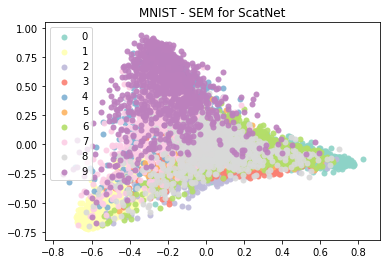

In [29]:
sem = SpectralEmbedding(n_components=2)
X = sem.fit_transform(scat_mnist_X)
print(X.shape)
name = sem_plot_name.format('ScatNet')
visualize(X, mnist_y, targets, target_names, name)

#### t-SNE - Scat

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 1.777s...
[t-SNE] Computed neighbors for 10000 samples in 582.113s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.872876
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.788902
[t-SNE] Error after 1000 iterations: 1.678081
(10000, 2)


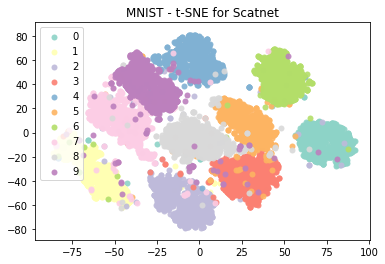

In [30]:
tsne = TSNE(n_components=2, init='pca', verbose=1)
X = tsne.fit_transform(scat_mnist_X)
print(X.shape)
name = tsne_plot_name.format('Scatnet')
visualize(X, mnist_y, targets, target_names, name)

#### PCA - ResNet

(10000, 2)


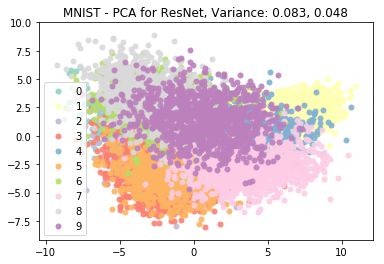

In [31]:
pca = decomposition.PCA(n_components=2)
X = pca.fit_transform(resnet_mnist_X.reshape(10000, 512))
print(X.shape)
variance = pca.explained_variance_ratio_
name = pca_plot_name.format('ResNet', variance[0], variance[1])
visualize(X, mnist_y, targets, target_names, name)

#### LLE - ResNet

(10000, 2)


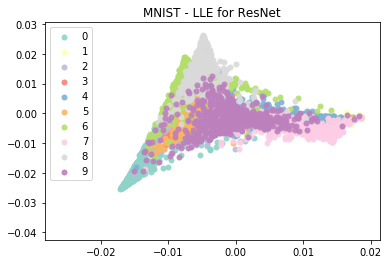

In [32]:
lle = LocallyLinearEmbedding(n_neighbors=10, n_components=2)
X = lle.fit_transform(resnet_mnist_X.reshape(10000, 512))
print(X.shape)
name = lle_plot_name.format('ResNet')
visualize(X, mnist_y, targets, target_names, name)

#### MDS - ResNet

In [ ]:
mds = MDS(n_components=2)
X = mds.fit_transform(resnet_mnist_X.reshape(10000, 512))
print(X.shape)
name = mds_plot_name.format('ResNet')
visualize(X, mnist_y, targets, target_names, plot_name)

#### Spectral - ResNet

(10000, 2)


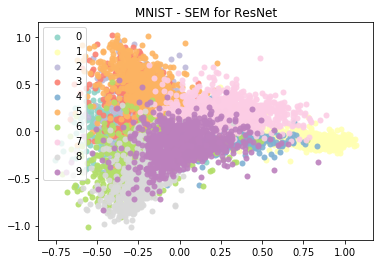

In [33]:
sem = SpectralEmbedding(n_components=2)
X = sem.fit_transform(resnet_mnist_X.reshape(10000, 512))
print(X.shape)
name = sem_plot_name.format('ResNet')
visualize(X, mnist_y, targets, target_names, name)

#### t-SNE - ResNet

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.277s...
[t-SNE] Computed neighbors for 10000 samples in 94.675s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 3.198093
[t-SNE] KL divergence after 250 iterations with early exaggeration: 91.551987
[t-SNE] Error after 1000 iterations: 2.533009
(10000, 2)


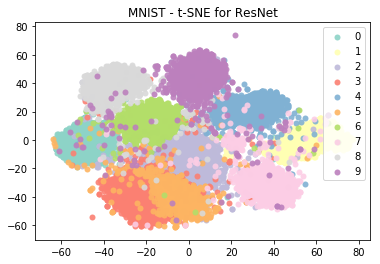

In [34]:
tsne = TSNE(n_components=2, init='pca', verbose=1)
X = tsne.fit_transform(resnet_mnist_X.reshape(10000, 512))
print(X.shape)
name = tsne_plot_name.format('ResNet')
visualize(X, mnist_y, targets, target_names, name)

### Fashion MNIST

In [35]:
targets = list(range(10))
target_names = [str(i) for i in range(10)]
pca_plot_name = 'Fashion - PCA for {}, Variance: {:.3f}, {:.3f}'
lle_plot_name = 'Fashion - LLE for {}'
tsne_plot_name = 'Fashion - t-SNE for {}'
mds_plot_name = 'Fashion - MDS for {}'
sem_plot_name = 'Fashion - SEM for {}'

#### PCA - Raw

(10000, 2)


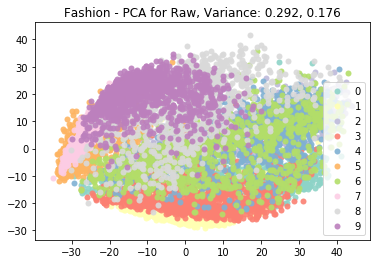

In [36]:
pca = decomposition.PCA(n_components=2)
X = pca.fit_transform(raw_fashion_X)
print(X.shape)
variance = pca.explained_variance_ratio_
name = pca_plot_name.format('Raw', variance[0], variance[1])
visualize(X, fashion_y, targets, target_names, name)

#### LLE - Raw

(10000, 2)


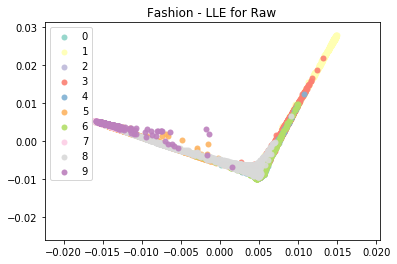

In [37]:
lle = LocallyLinearEmbedding(n_neighbors=10, n_components=2)
X = lle.fit_transform(raw_fashion_X)
print(X.shape)
name = lle_plot_name.format('Raw')
visualize(X, fashion_y, targets, target_names, name)

#### MDS - Raw

In [ ]:
mds = MDS(n_components=2)
X = mds.fit_transform(raw_fashion_X)
print(X.shape)
name = mds_plot_name.format('Raw')
visualize(X, fashion_y, targets, target_names, plot_name)

#### Spectral - Raw

(10000, 2)


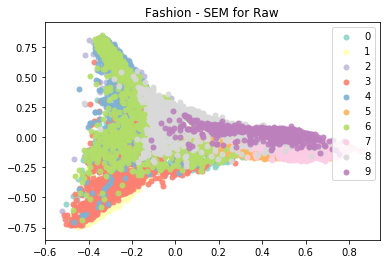

In [38]:
sem = SpectralEmbedding(n_components=2)
X = sem.fit_transform(raw_fashion_X)
print(X.shape)
name = sem_plot_name.format('Raw')
visualize(X, fashion_y, targets, target_names, name)

#### t-SNE - Raw

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.252s...
[t-SNE] Computed neighbors for 10000 samples in 131.484s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 6.375069
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.916481
[t-SNE] Error after 1000 iterations: 1.639389
(10000, 2)


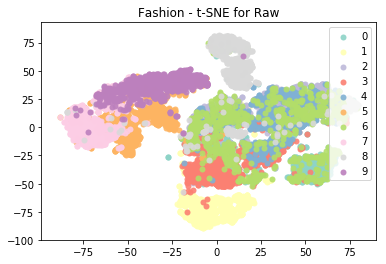

In [39]:
tsne = TSNE(n_components=2, init='pca', verbose=1)
X = tsne.fit_transform(raw_fashion_X)
print(X.shape)
name = tsne_plot_name.format('Raw')
visualize(X, fashion_y, targets, target_names, name)

#### PCA - VGG19

(10000, 2)


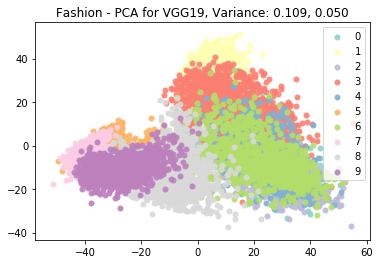

In [40]:
pca = decomposition.PCA(n_components=2)
X = pca.fit_transform(vgg_fashion_X.reshape(10000, 512*7*7))
print(X.shape)
variance = pca.explained_variance_ratio_
name = pca_plot_name.format('VGG19', variance[0], variance[1])
visualize(X, fashion_y, targets, target_names, name)

#### PCA - ScatNet

(10000, 2)


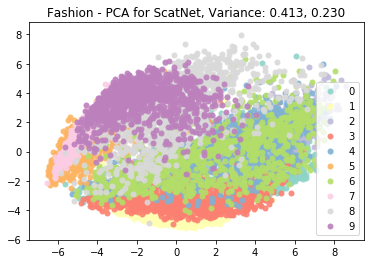

In [41]:
pca = decomposition.PCA(n_components=2)
X = pca.fit_transform(scat_fashion_X)
print(X.shape)
variance = pca.explained_variance_ratio_
name = pca_plot_name.format('ScatNet', variance[0], variance[1])
visualize(X, fashion_y, targets, target_names, name)

#### LLE - Scat

(10000, 2)


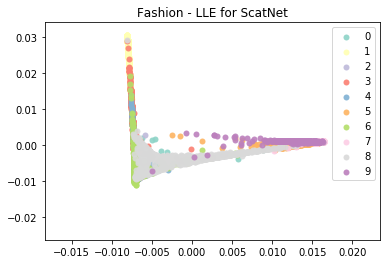

In [42]:
lle = LocallyLinearEmbedding(n_neighbors=10, n_components=2)
X = lle.fit_transform(scat_fashion_X)
print(X.shape)
name = lle_plot_name.format('ScatNet')
visualize(X, fashion_y, targets, target_names, name)

#### MDS - Scat

In [ ]:
mds = MDS(n_components=2)
X = mds.fit_transform(scat_fashion_X)
print(X.shape)
name = mnist_mds_plot_name.format('ScatNet')
visualize(X, fashion_y, targets, target_names, name)

#### Spectral - Scat

In [43]:
sem = SpectralEmbedding(n_components=2)
X = sem.fit_transform(scat_fashion_X)
print(X.shape)

(10000, 2)


NameError: name 'mnist_sem_plot_name' is not defined

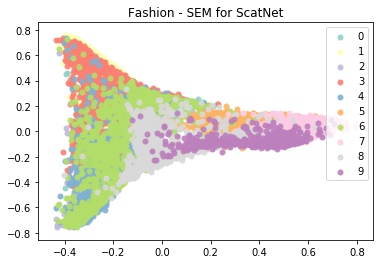

In [44]:
name = sem_plot_name.format('ScatNet')
visualize(X, fashion_y, targets, target_names, name)

#### t-SNE - Scat

In [ ]:
tsne = TSNE(n_components=2, init='pca', verbose=1)
X = tsne.fit_transform(scat_fashion_X)
print(X.shape)

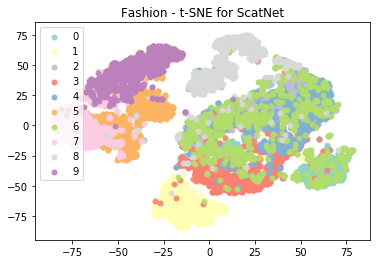

In [46]:
name = tsne_plot_name.format('ScatNet')
visualize(X, fashion_y, targets, target_names, name)

#### PCA - ResNet

(10000, 2)


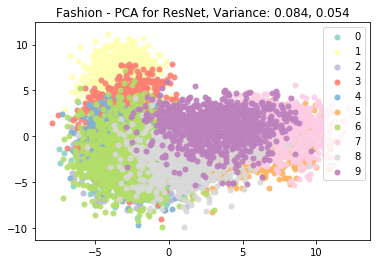

In [47]:
pca = decomposition.PCA(n_components=2)
X = pca.fit_transform(resnet_fashion_X.reshape(10000, 512))
print(X.shape)
variance = pca.explained_variance_ratio_
name = pca_plot_name.format('ResNet', variance[0], variance[1])
visualize(X, fashion_y, targets, target_names, name)

#### LLE - ResNet

(10000, 2)


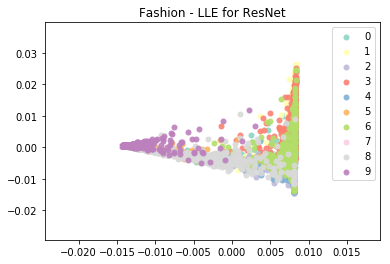

In [48]:
lle = LocallyLinearEmbedding(n_neighbors=10, n_components=2)
X = lle.fit_transform(resnet_fashion_X.reshape(10000, 512))
print(X.shape)
name = lle_plot_name.format('ResNet')
visualize(X, fashion_y, targets, target_names, name)

#### MDS - ResNet

In [ ]:
mds = MDS(n_components=2)
X = mds.fit_transform(resnet_fashion_X.reshape(10000, 512))
print(X.shape)
name = mds_plot_name.format('ResNet')
visualize(X, fashion_y, targets, target_names, name)

#### Spectral - ResNet

(10000, 2)


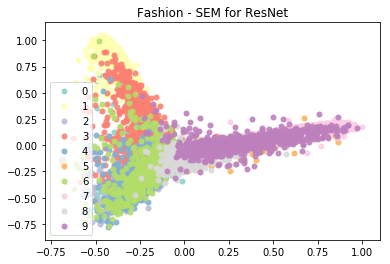

In [49]:
sem = SpectralEmbedding(n_components=2)
X = sem.fit_transform(resnet_fashion_X.reshape(10000, 512))
print(X.shape)
name = sem_plot_name.format('ResNet')
visualize(X, fashion_y, targets, target_names, name)

#### t-SNE - ResNet

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.260s...
[t-SNE] Computed neighbors for 10000 samples in 92.730s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 3.371105
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.306557
[t-SNE] Error after 1000 iterations: 2.379742
(10000, 2)


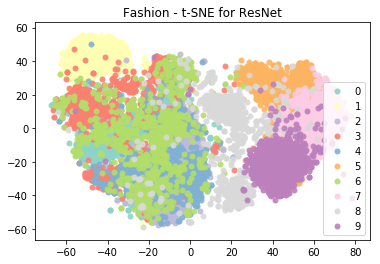

In [50]:
tsne = TSNE(n_components=2, init='pca', verbose=1)
X = tsne.fit_transform(resnet_fashion_X.reshape(10000, 512))
print(X.shape)
name = tsne_plot_name.format('ResNet')
visualize(X, fashion_y, targets, target_names, name)

### CIFAR-10

In [51]:
targets = list(range(10))
target_names = [str(i) for i in range(10)]
pca_plot_name = 'CIFAR10 - PCA for {}, Variance: {:.3f}, {:.3f}'
lle_plot_name = 'CIFAR10 - LLE for {}'
tsne_plot_name = 'CIFAR10 - t-SNE for {}'
mds_plot_name = 'CIFAR10 - MDS for {}'
sem_plot_name = 'CIFAR10 - SEM for {}'

#### PCA - Raw

(10000, 2)


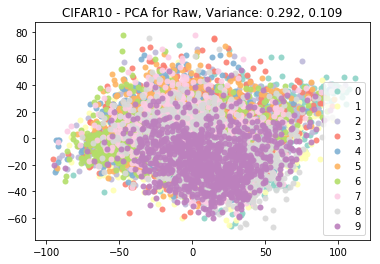

In [52]:
pca = decomposition.PCA(n_components=2)
X = pca.fit_transform(raw_cifar_X)
print(X.shape)
variance = pca.explained_variance_ratio_
name = pca_plot_name.format('Raw', variance[0], variance[1])
visualize(X, cifar_y, targets, target_names, name)

#### LLE - Raw

(10000, 2)


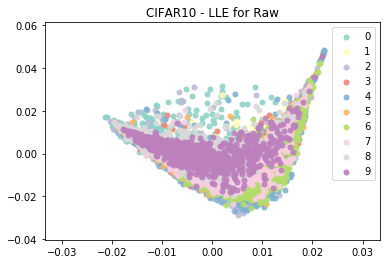

In [53]:
lle = LocallyLinearEmbedding(n_neighbors=10, n_components=2)
X = lle.fit_transform(raw_cifar_X)
print(X.shape)
name = lle_plot_name.format('Raw')
visualize(X, cifar_y, targets, target_names, name)

#### MDS - Raw

In [ ]:
mds = MDS(n_components=2)
X = mds.fit_transform(raw_cifar_X)
print(X.shape)
name = mds_plot_name.format('Raw')
visualize(X, cifar_y, targets, target_names, name)

#### Spectral - Raw

(10000, 2)


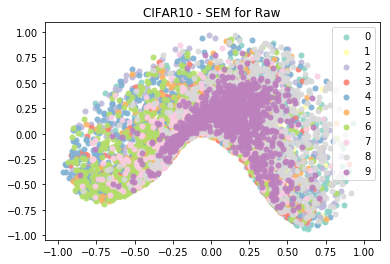

In [54]:
sem = SpectralEmbedding(n_components=2)
X = sem.fit_transform(raw_cifar_X)
print(X.shape)
name = sem_plot_name.format('Raw')
visualize(X, cifar_y, targets, target_names, name)

#### t-SNE - Raw

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 2.094s...
[t-SNE] Computed neighbors for 10000 samples in 518.183s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 11.606484
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.787140
[t-SNE] Error after 1000 iterations: 3.049485
(10000, 2)


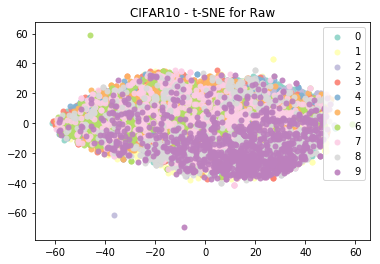

In [55]:
tsne = TSNE(n_components=2, init='pca', verbose=1)
X = tsne.fit_transform(raw_cifar_X)
print(X.shape)
name = tsne_plot_name.format('Raw')
visualize(X, cifar_y, targets, target_names, name)

#### PCA - VGG19

(10000, 2)


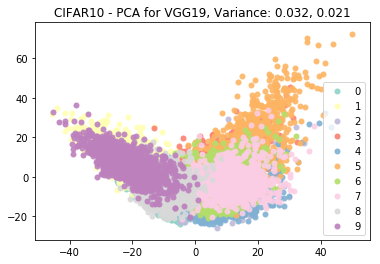

In [56]:
pca = decomposition.PCA(n_components=2)
X = pca.fit_transform(vgg_cifar_X.reshape(10000, 512*7*7))
print(X.shape)
variance = pca.explained_variance_ratio_
name = pca_plot_name.format('VGG19', variance[0], variance[1])
visualize(X, cifar_y, targets, target_names, name)

#### PCA - ScatNet

(10000, 2)


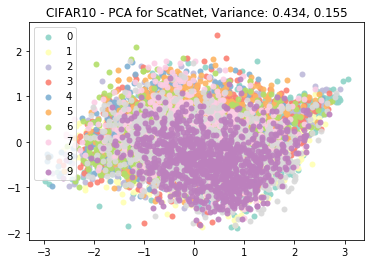

In [57]:
pca = decomposition.PCA(n_components=2)
X = pca.fit_transform(scat_cifar_X)
print(X.shape)
variance = pca.explained_variance_ratio_
name = pca_plot_name.format('ScatNet', variance[0], variance[1])
visualize(X, cifar_y, targets, target_names, name)

#### LLE - Scat

(10000, 2)


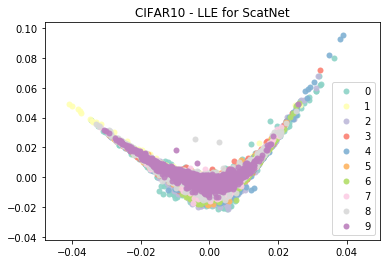

In [58]:
lle = LocallyLinearEmbedding(n_neighbors=10, n_components=2)
X = lle.fit_transform(scat_cifar_X)
print(X.shape)
name = lle_plot_name.format('ScatNet')
visualize(X, cifar_y, targets, target_names, name)

#### MDS - Scat

In [ ]:
mds = MDS(n_components=2)
X = mds.fit_transform(scat_cifar_X)
print(X.shape)
name = mds_plot_name.format('ScatNet')
visualize(X, cifar_y, targets, target_names, name)

#### Spectral - Scat

In [ ]:
sem = SpectralEmbedding(n_components=2)
X = sem.fit_transform(scat_cifar_X)
print(X.shape)

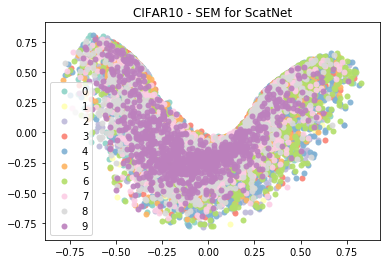

In [60]:
name = sem_plot_name.format('ScatNet')
visualize(X, cifar_y, targets, target_names, name)

#### t-SNE - Scat

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.703s...
[t-SNE] Computed neighbors for 10000 samples in 255.575s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.287591
[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.608696
[t-SNE] Error after 1000 iterations: 2.607466
(10000, 2)


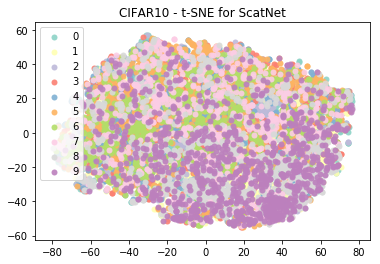

In [61]:
tsne = TSNE(n_components=2, init='pca', verbose=1)
X = tsne.fit_transform(scat_cifar_X)
print(X.shape)
name = tsne_plot_name.format('ScatNet')
visualize(X, cifar_y, targets, target_names, name)

#### PCA - ResNet

(10000, 2)


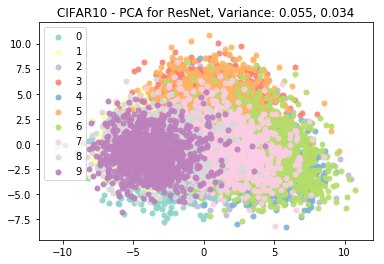

In [62]:
pca = decomposition.PCA(n_components=2)
X = pca.fit_transform(resnet_cifar_X.reshape(10000, 512))
print(X.shape)
variance = pca.explained_variance_ratio_
name = pca_plot_name.format('ResNet', variance[0], variance[1])
visualize(X, cifar_y, targets, target_names, name)

#### LLE - ResNet

(10000, 2)


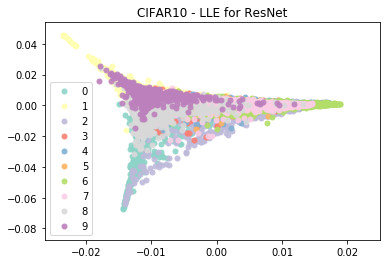

In [63]:
lle = LocallyLinearEmbedding(n_neighbors=10, n_components=2)
X = lle.fit_transform(resnet_cifar_X.reshape(10000, 512))
print(X.shape)
name = lle_plot_name.format('ResNet')
visualize(X, cifar_y, targets, target_names, name)

#### MDS - ResNet

In [ ]:
mds = MDS(n_components=2)
X = mds.fit_transform(resnet_cifar_X.reshape(10000, 512))
print(X.shape)
name = mds_plot_name.format('ResNet')
visualize(X, cifar_y, targets, target_names, name)

#### Spectral - ResNet

(10000, 2)


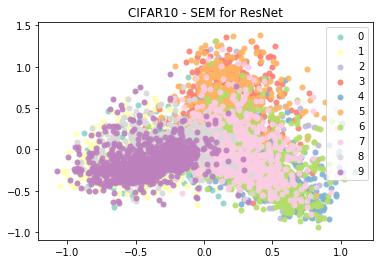

In [ ]:
sem = SpectralEmbedding(n_components=2)
X = sem.fit_transform(resnet_cifar_X.reshape(10000, 512))
print(X.shape)
name = sem_plot_name.format('ResNet')
visualize(X, cifar_y, targets, target_names, name)

#### t-SNE - ResNet

In [ ]:
tsne = TSNE(n_components=2, init='pca', verbose=1)
X = tsne.fit_transform(resnet_cifar_X.reshape(10000, 512))
print(X.shape)
name = tsne_plot_name.format('ResNet')
visualize(X, cifar_y, targets, target_names, name)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.252s...
[t-SNE] Computed neighbors for 10000 samples in 97.188s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 3.687792
